In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lex-fridman-podcast-transcript/podcastdata_dataset.csv


In [3]:
data=pd.read_csv('/kaggle/input/lex-fridman-podcast-transcript/podcastdata_dataset.csv')

This dataset features discussions with thought leaders from diverse fields such as technology, science, philosophy, and art, this dataset offers a treasure trove of insights and wisdom. Exploring the nuances of each conversation can uncover emerging trends. Exploring some concepts below: 

In [4]:
data.head()

,id,guest,title,text
0,1,Max Tegmark,Life 3.0,"As part of MIT course 6S099, Artificial Genera..."
1,2,Christof Koch,Consciousness,As part of MIT course 6S099 on artificial gene...
2,3,Steven Pinker,AI in the Age of Reason,"You've studied the human mind, cognition, lang..."
3,4,Yoshua Bengio,Deep Learning,What difference between biological neural netw...
4,5,Vladimir Vapnik,Statistical Learning,The following is a conversation with Vladimir ...


In [5]:
from gensim.models.word2vec import Word2Vec

In [6]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["dr", "doctor"]] #remove task specific stopwords
  text = " ".join(text)
  # stemmer_ps = PorterStemmer()  
  # text = [stemmer_ps.stem(word) for word in text.split()] #stemming
  # text = " ".join(text)
  # lemmatizer = WordNetLemmatizer()
  # text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  # text = " ".join(text)
  return(text)

In [7]:
data['review_processed']=data['text'].apply(lambda x:preprocess(x))
data['review_processed']=data['review_processed'].apply(lambda x:x.split())

In [8]:
model = Word2Vec(sentences=data['review_processed'].tolist(), vector_size=100, sg=1,min_count=5,window=5,workers=50,seed=10,epochs=50)

In [10]:
model.save('w2v_dr.w2v')

In [11]:
model=Word2Vec.load('w2v_dr.w2v')

In [12]:
vocab = model.wv.index_to_key

In [13]:
len(vocab)

20686

In [36]:
model.wv.most_similar('drugs', topn=10)

[('drug', 0.7947916984558105),
 ('heroin', 0.6414815187454224),
 ('cocaine', 0.6385436058044434),
 ('amphetamines', 0.6251744627952576),
 ('alcohol', 0.6185871362686157),
 ('methamphetamine', 0.6032404899597168),
 ('overdose', 0.6008513569831848),
 ('prohibition', 0.5948024988174438),
 ('antiviral', 0.5942502617835999),
 ('mdma', 0.5847554802894592)]

In [49]:
model.wv.most_similar('race', topn=10)

[('races', 0.540435254573822),
 ('revisiting', 0.48727989196777344),
 ('runnable', 0.47012320160865784),
 ('termination', 0.4670187532901764),
 ('america', 0.4659351110458374),
 ('zerg', 0.46589717268943787),
 ('sowell', 0.4594998359680176),
 ('concerned', 0.45763295888900757),
 ('racism', 0.45637795329093933),
 ('arms', 0.4561975598335266)]

In [19]:
v_time = model.wv['time']

In [20]:
v_time

array([ 0.08502568,  0.2637185 , -0.10386436, -0.04524755,  0.29718307,
       -0.23789947, -0.1306886 ,  0.05646807,  0.07593165,  0.00941648,
        0.07899774,  0.26162753, -0.16632882,  0.19484468,  0.43976286,
       -0.10665083,  0.26128513, -0.00860226, -0.29585108, -0.08840697,
        0.20042522, -0.15295489, -0.13869673,  0.39574483,  0.08243836,
        0.1937781 ,  0.13864002,  0.11403711, -0.06644592,  0.2742093 ,
        0.04500782,  0.00447234, -0.15552334,  0.02520572, -0.18582267,
        0.33886406,  0.05743774, -0.42512128, -0.2368875 ,  0.2097222 ,
       -0.0819483 , -0.08053171,  0.17815143,  0.11204328, -0.14311968,
        0.438252  ,  0.05172421,  0.06408562, -0.12762944, -0.01522754,
        0.09883542,  0.07147852, -0.00097395, -0.1814416 , -0.03712356,
       -0.15559816,  0.206684  , -0.1584284 , -0.0570005 ,  0.07172579,
        0.08260546,  0.03851016,  0.05423574, -0.01521247, -0.09152457,
       -0.17880435,  0.04963194,  0.23729376,  0.37087137, -0.39

In [59]:
print(model.wv.similarity('rich', 'interesting'))
print(model.wv.similarity('artificial', 'interesting'))
print(model.wv.similarity('psychology', 'interesting'))
print(model.wv.similarity('race', 'interesting'))

0.377672
0.33785364
0.34106627
0.24520005


Exploring the relationship regarding the 'interesting' exclamation with regards to topic names

In [60]:
print(model.wv.similarity('mistake', 'capitalism'))
print(model.wv.similarity('race', 'capitalism'))
print(model.wv.similarity('global', 'capitalism'))
print(model.wv.similarity('war', 'capitalism'))

0.23483883
0.27713072
0.31781733
0.35185987


Finding similar sentiments/topics related to capitalism - related discussions on the podcast

In [34]:
v_war=model.wv['war']

In [35]:
v_race = model.wv['race']
v_religion = model.wv['religion']

created_st = v_race  + v_religion
np.dot(created_st, v_war)/(np.linalg.norm(created_st)* np.linalg.norm(v_war))


0.3267056

War is a possible topic of discussion on the show when the words 'race' & 'religion' are used (0.32 cosine similariy) 

In [46]:
v_russia = model.wv['russia']
v_issues = model.wv['issues']
v_nuclear = model.wv['nuclear']
created_nuclear = v_russia + v_issues
np.dot(created_nuclear, v_nuclear)/(np.linalg.norm(created_nuclear)* np.linalg.norm(v_nuclear))

0.44290972

Nuclear war is a possible 'issue' discussed while talking about 'Russia' (high cosine similarity of .442) 

In [47]:
model.wv.vectors.shape

(20686, 100)

In [61]:
outdata=pd.DataFrame(model.wv.vectors)

In [62]:
outdata.to_csv('word2vec_ratemds.tsv',sep='\t',index=False,header=False)

In [63]:
pd.DataFrame(model.wv.index_to_key).to_csv('word2vec_ratemds_words.tsv',sep='\t',index=False,header=False)

In [ ]:
https://projector.tensorflow.org/


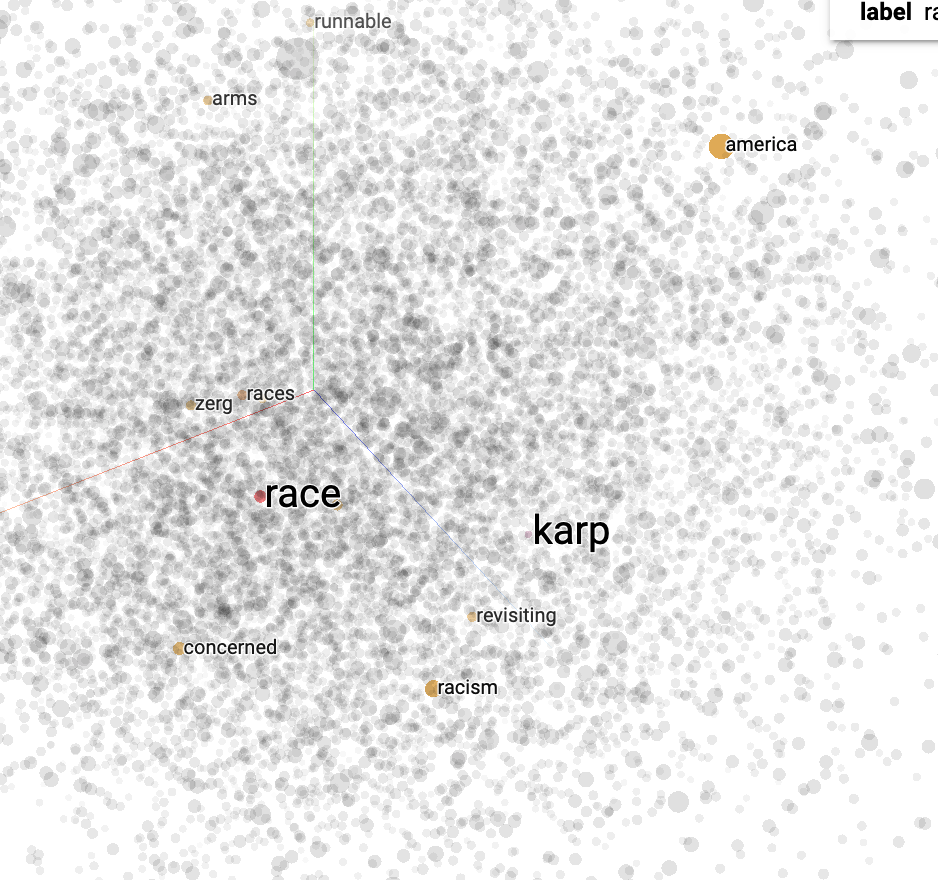


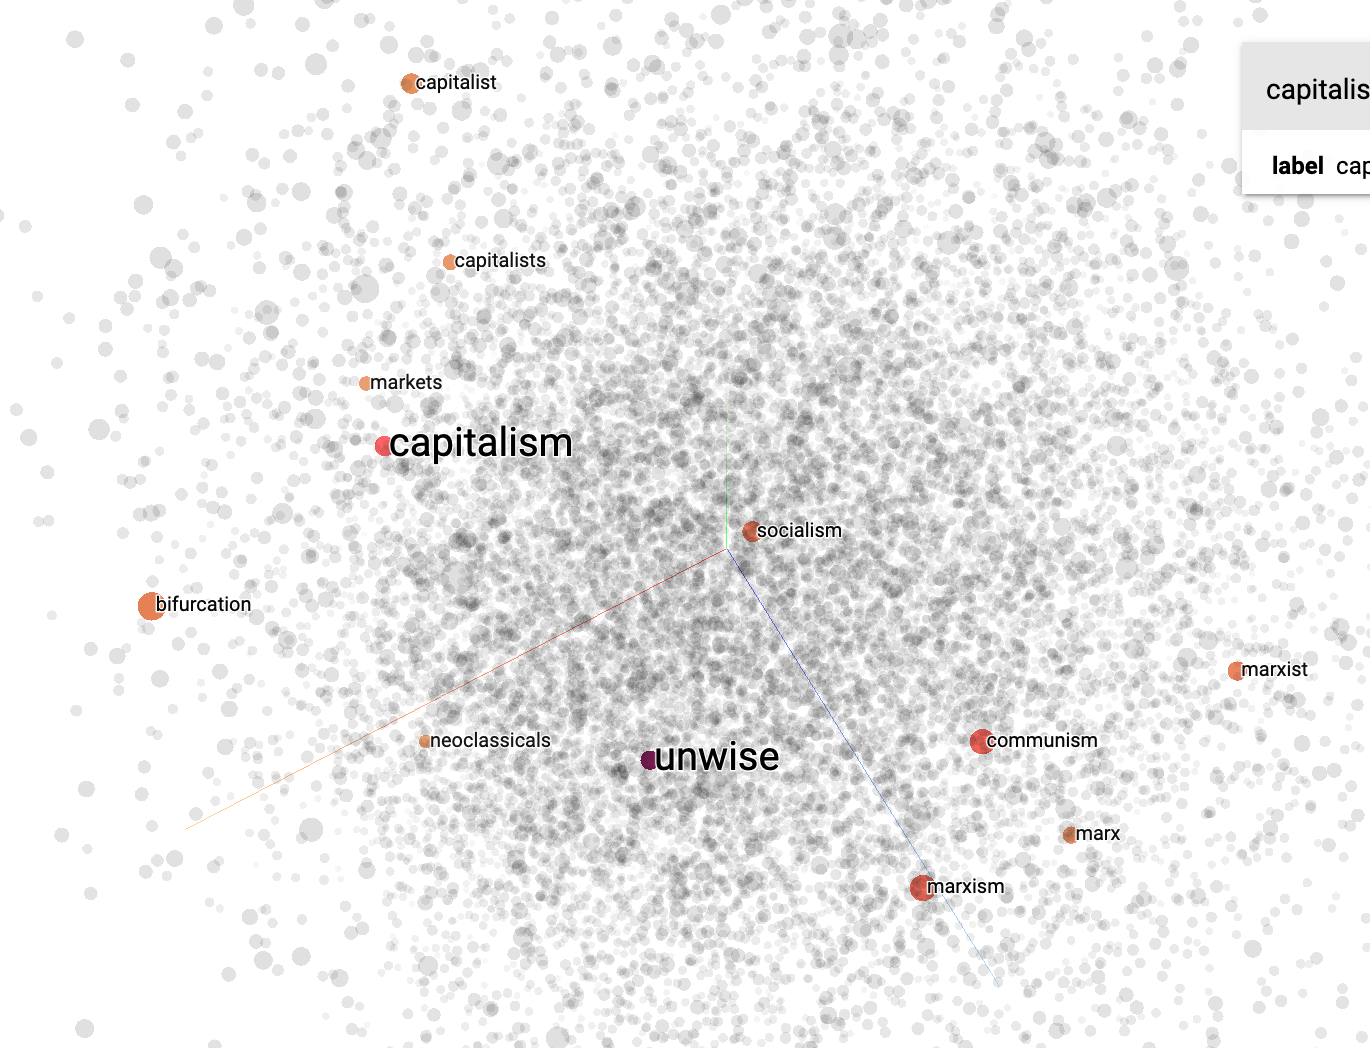

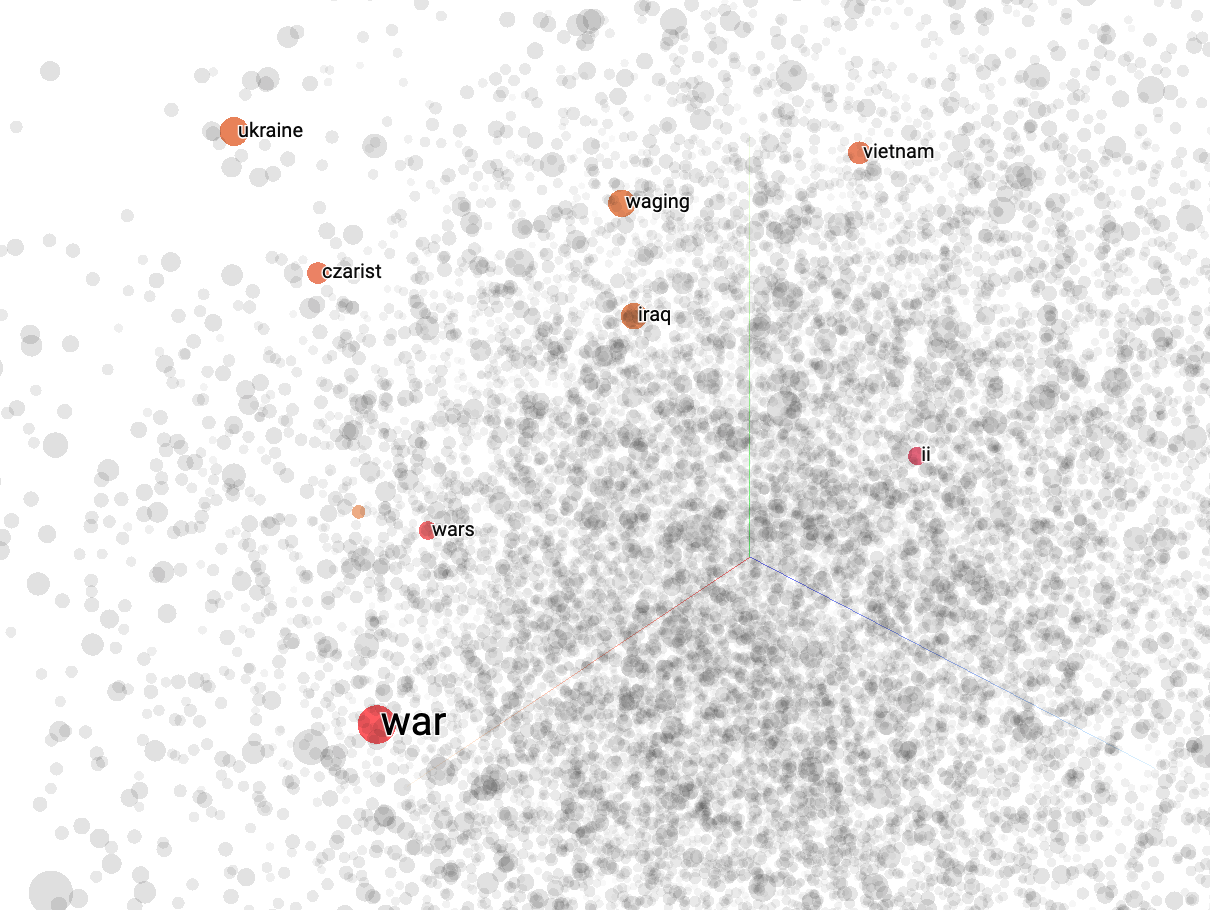